<a href="https://colab.research.google.com/github/ruus77/data_analysis/blob/main/Backtesting_on_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

In [2]:
tickers = "SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA ADBE"
data = yf.download(
    tickers=tickers,
    period="max",
    interval="1d",
    ignore_tz=True,
    auto_adjust=True,
  #  group_by=tickers
)

[*********************100%***********************]  10 of 10 completed


In [3]:
data.head()

Price          Close                                            ...  \
Ticker          AAPL ADBE AMZN GOOG MSFT NFLX NVDA QQQ SPY TLT  ...   
Date                                                            ...   
1980-12-12  0.098485  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-15  0.093347  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-16  0.086495  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-17  0.088636  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   
1980-12-18  0.091206  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  ...   

Price          Volume                                            
Ticker           AAPL ADBE AMZN GOOG MSFT NFLX NVDA QQQ SPY TLT  
Date                                                             
1980-12-12  469033600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-15  175884800  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-16  105728000  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-17   86441600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-18   73449600  NaN  NaN  NaN  NaN  NaN  NaN NaN NaN NaN  

[5 rows x 50 columns]

In [4]:
data = data["Close"]

In [5]:
data.head()

Ticker,AAPL,ADBE,AMZN,GOOG,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,
1980-12-12,0.098485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.086495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.088636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.091206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data[data.notnull().all(1)]

Ticker,AAPL,ADBE,AMZN,GOOG,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,
2004-08-19,0.460959,22.649828,1.931500,2.482147,16.744205,2.264286,0.089091,28.519308,73.969147,43.738747
2004-08-20,0.462310,23.029572,1.975500,2.679304,16.793598,2.262857,0.094363,28.807287,74.488289,43.698338
2004-08-23,0.466513,22.799728,1.972500,2.706268,16.867903,2.272857,0.096426,28.875065,74.299507,43.445904
2004-08-24,0.479572,22.849693,1.952500,2.594207,16.867903,2.208571,0.092835,28.866600,74.400612,43.471111
2004-08-25,0.496083,23.104523,2.015000,2.622160,17.059872,2.238571,0.096808,29.264681,74.906326,43.622616
...,...,...,...,...,...,...,...,...,...,...
2025-09-08,237.880005,358.660004,235.839996,234.160004,498.200012,1244.760010,168.300507,578.869995,648.830017,89.739998
2025-09-09,234.350006,354.059998,238.240005,239.940002,498.410004,1263.250000,170.750366,580.510010,650.330017,89.230003
2025-09-10,226.789993,350.160004,230.330002,239.559998,500.369995,1247.709961,177.320007,580.700012,652.210022,89.739998


In [7]:
data = data["20040901":]

In [8]:
ticker = "SPY"
close_adj = data[[ticker]].copy()
close_adj.columns = ["close"]
close_adj.head()
close_adj.dropna()

close_adj = close_adj["19930201":]
close_adj.head()

,close
Date,
2004-09-01,75.054634
2004-09-02,75.904137
2004-09-03,75.594025
2004-09-07,76.092934
2004-09-08,75.904137


In [9]:
close_adj["R"] = (close_adj["close"] / close_adj["close"].shift()) - 1
close_adj = close_adj.fillna(0)
close_adj.head()

,close,R
Date,,
2004-09-01,75.054634,0.000000
2004-09-02,75.904137,0.011318
2004-09-03,75.594025,-0.004086
2004-09-07,76.092934,0.006600
2004-09-08,75.904137,-0.002481


In [10]:
close_adj.index = pd.to_datetime(close_adj.index)

In [11]:
close_adj["slow_ma"] = close_adj.close.rolling(window=200).mean()
close_adj["fast_ma"] = close_adj.close.rolling(window=10).mean()
close_adj.sample(10)

,close,R,slow_ma,fast_ma
Date,,,,
2005-10-18,81.368393,-0.010830,82.306563,81.907078
2018-10-23,246.041229,-0.005091,246.851186,248.454820
2015-07-08,172.413513,-0.016777,171.772808,174.961803
2012-08-10,111.694138,0.001636,104.564359,110.381604
2006-01-05,88.437042,0.000629,83.504559,87.602502
2008-04-07,99.122086,0.000512,103.728052,97.595732
2006-10-11,95.009117,-0.001183,89.817916,94.530221
2025-04-09,547.002930,0.105019,568.999625,538.316589
2018-05-08,237.875565,0.000000,231.492664,236.313287


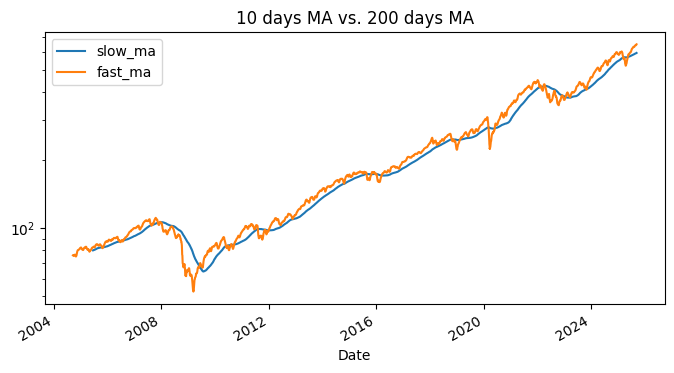

In [12]:
close_adj[["slow_ma", "fast_ma"]].plot(kind="line", logy = True, figsize=(8,4), title="10 days MA vs. 200 days MA");

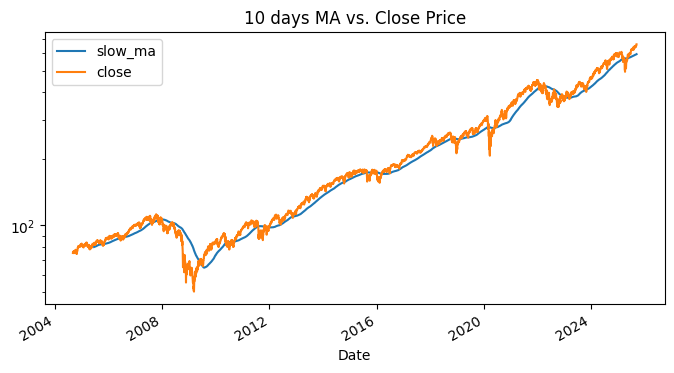

In [13]:
close_adj[["slow_ma", "close"]].plot(kind="line", logy = True, figsize=(8,4), title="10 days MA vs. Close Price");

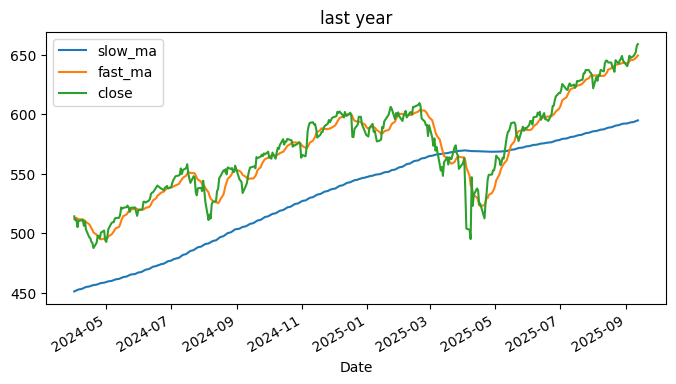

In [14]:
close_adj[["slow_ma",
           "fast_ma",
           "close"]].tail(365).plot(kind="line",
                                    figsize=(8,4),
                                    title="last year");

In [15]:
close_adj = close_adj[close_adj.notnull().all(1)]

In [16]:
close_adj.head()

,close,R,slow_ma,fast_ma
Date,,,,
2005-06-16,83.149857,0.002560,79.922769,82.522446
2005-06-17,83.457947,0.003705,79.964786,82.638873
2005-06-20,83.485435,0.000329,80.002692,82.765581
2005-06-21,83.533569,0.000577,80.042390,82.890942
2005-06-22,83.602325,0.000823,80.079937,83.038245


In [17]:
close_adj = close_adj.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
)
close_adj.signal = close_adj.signal.shift(1, fill_value=0)
close_adj.signal.head(5)

,signal
Date,
2005-06-16,0
2005-06-17,1
2005-06-20,1
2005-06-21,1
2005-06-22,1


In [18]:
close_adj.signal.value_counts()

,count
signal,
1,4019
0,1074


In [19]:
close_adj.columns

Index(['close', 'R', 'slow_ma', 'fast_ma', 'signal'], dtype='object')

In [20]:
close_adj["R_strategy"] = close_adj.R * close_adj.signal

In [21]:
close_adj.sample(5)

,close,R,slow_ma,fast_ma,signal,R_strategy
Date,,,,,,
2024-11-19,584.826477,0.003655,533.405052,588.020618,1,0.003655
2010-09-28,87.763817,0.003501,84.867418,86.890199,1,0.003501
2023-03-30,391.778076,0.005855,377.830337,384.384106,1,0.005855
2018-05-25,242.536453,-0.002383,233.137300,242.754770,1,-0.002383
2012-03-07,106.588043,0.006976,98.339067,107.423066,1,0.006976


In [22]:
def get_signal(data, ticker, fast_ma, slow_ma):
  close_adj = data[[ticker]].copy()
  close_adj.columns = ["close"]

  close_adj["R"] = (close_adj["close"] / close_adj["close"].shift()) - 1
  close_adj = close_adj.fillna(0)

  close_adj["slow_ma"] = close_adj.close.rolling(window=slow_ma).mean()
  close_adj["fast_ma"] = close_adj.close.rolling(window=fast_ma).mean()
  close_adj = close_adj[close_adj.notnull().all(1)]

  close_adj = close_adj.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
  )
  close_adj.signal = close_adj.signal.shift(1, fill_value=0)

  close_adj["R_strategy"] = close_adj.R * close_adj.signal

  return close_adj

In [23]:
TICKER = "SPY"
df_signal = get_signal(data=data,
                       ticker=TICKER,
                       fast_ma=10,
                       slow_ma=65)
df_signal.sample(5)

,close,R,slow_ma,fast_ma,signal,R_strategy
Date,,,,,,
2011-05-26,102.772720,0.004608,102.274848,102.962022,1,0.004608
2023-11-01,413.154053,0.010665,425.801311,409.472748,0,0.000000
2019-05-30,253.492065,0.002731,258.710132,257.280412,0,0.000000
2020-12-23,345.085907,0.000899,328.339763,344.753571,1,0.000899
2015-03-10,171.192184,-0.016222,171.716035,175.243602,1,-0.016222


In [24]:
df_signal.signal.value_counts(), close_adj.signal.value_counts()

(signal
 1    3782
 0    1446
 Name: count, dtype: int64,
 signal
 1    4019
 0    1074
 Name: count, dtype: int64)

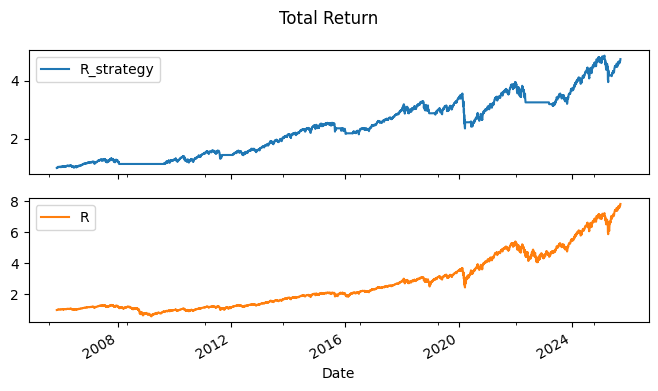

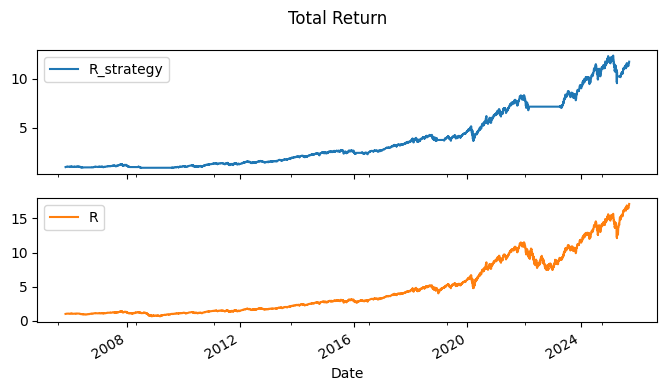

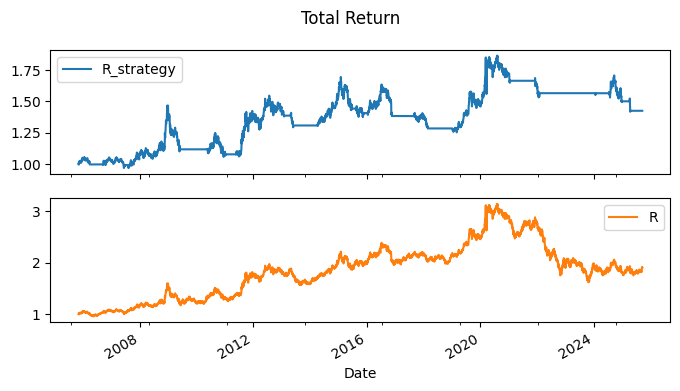

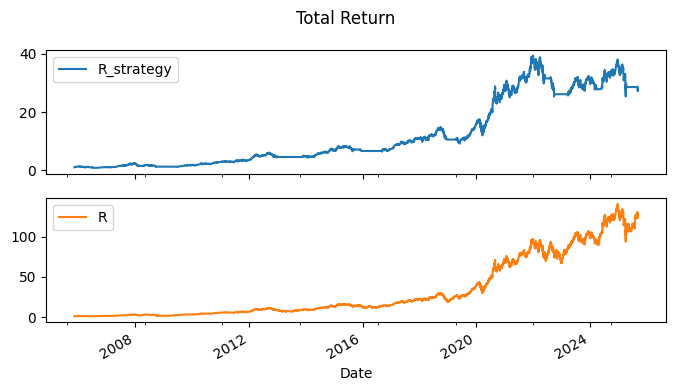

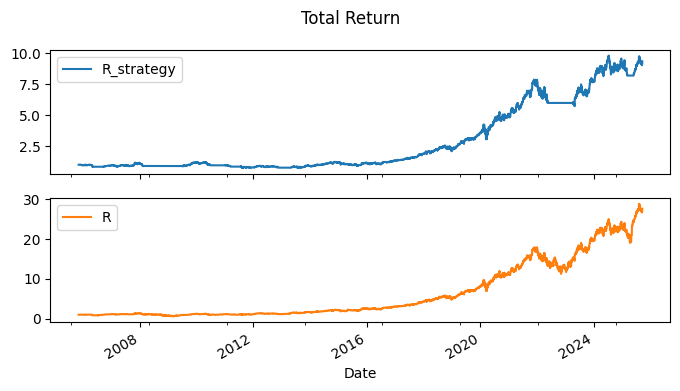

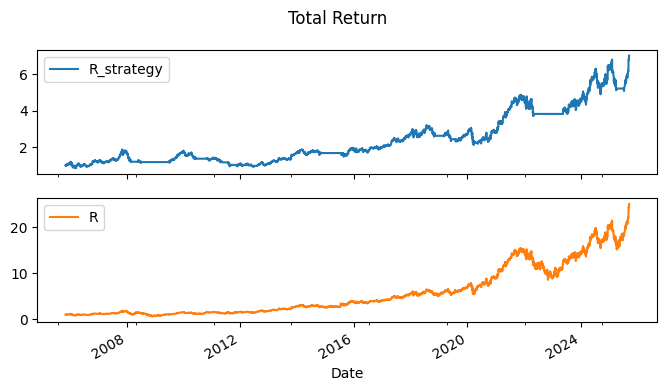

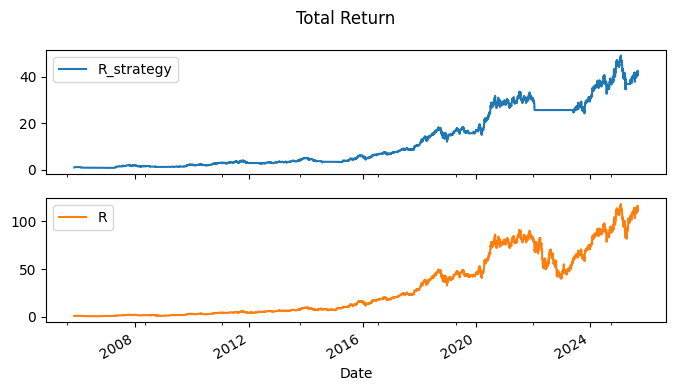

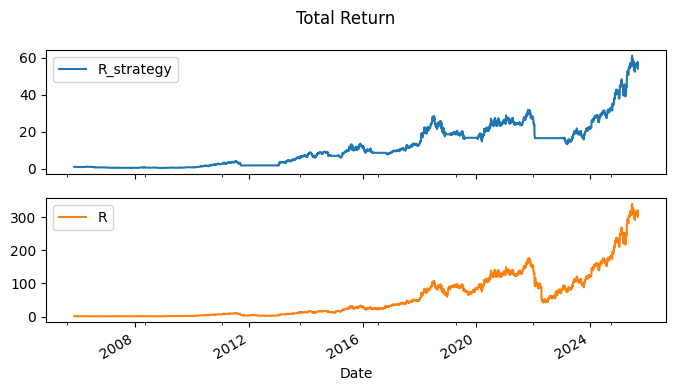

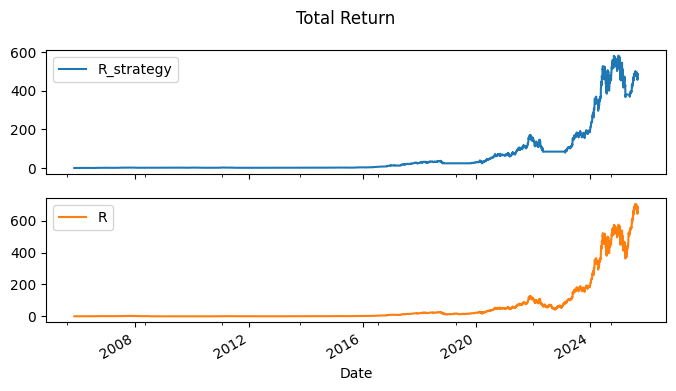

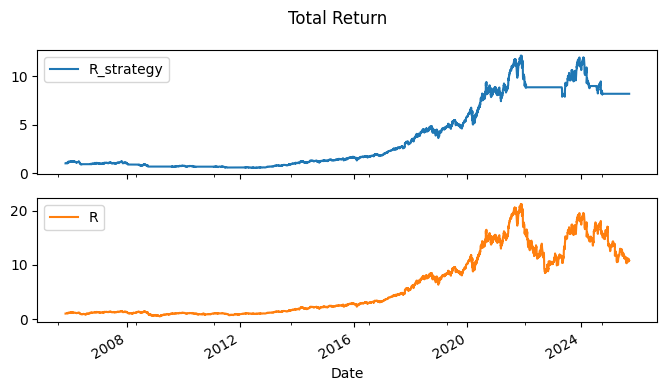

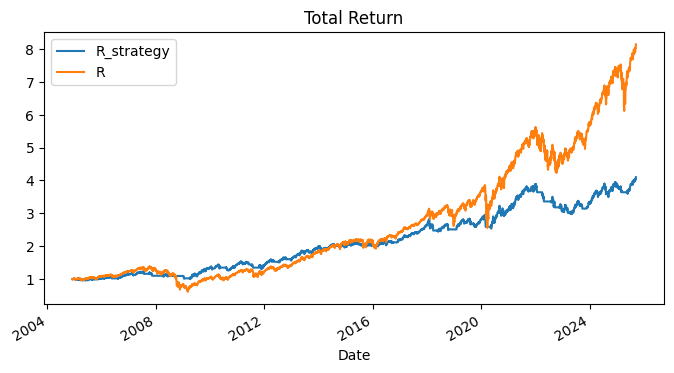

In [28]:
(1 + df_signal[["R_strategy", "R"]]).cumprod().plot(kind="line",
                                                    figsize=(8,4),
                                                    title="Total Return",);

In [30]:
from math import sqrt
def performence(df_signal,
                ticker,
                freq="M",
                risk_free_rate=0.02):
  rets = df_signal[["R", "R_strategy"]].copy()
  rets.columns = ["Buy & Hold", "Strategy"]

  if freq=="D":
    scale=252
  elif freq =="M":
    scale=12
    rets = rets.resample(freq).agg(lambda x: (1+x).prod() - 1)
  else:
    return None
  # Compute Results
  ret_cumulative = (1 + rets).cumprod()
  prev_peaks = ret_cumulative.cummax()
  drawdown = (ret_cumulative - prev_peaks) / prev_peaks

  # compute annualized returns and risk
  annualized_returns = (1 + rets.mean())**scale - 1
  annualized_std = (1 + rets.std())*np.sqrt(scale)
  max_drawdown = drawdown.min()*-1

  df_risk_return = pd.DataFrame(
      dict(
      ticker=ticker,
     annualized_returns=annualized_returns,
      annualized_std=annualized_std
          )
  )
  df_risk_return["max_drawdown"] = drawdown.min()*-1
  df_risk_return=df_risk_return.assign(
      sharp_ratio = lambda x:(x.annualized_returns - risk_free_rate)/x.annualized_std,
      calmar_ratio=lambda x:(x.annualized_returns)/x["max_drawdown"],

  )
  return df_risk_return



In [35]:
TICKER_1 = "SPY"
df_signal_1 = get_signal(data=data,
                       ticker=TICKER_1,
                       fast_ma=10,
                       slow_ma=65)

TICKER_2 = "QQQ"
df_signal_2 = get_signal(data=data,
                       ticker=TICKER_2,
                       fast_ma=10,
                       slow_ma=65)


performence_1 = performence(df_signal_1,
                ticker=TICKER_1,
                freq="D",
                risk_free_rate=0.02)
performence_2 = performence(df_signal_2,
                ticker=TICKER_2,
                freq="D",
                risk_free_rate=0.02)

perf = pd.concat([performence_1, performence_2],
                 axis=0)
perf

,ticker,annualized_returns,annualized_std,max_drawdown,sharp_ratio,calmar_ratio
Buy & Hold,SPY,0.126716,16.065562,0.551894,0.006643,0.229602
Strategy,SPY,0.077151,15.986763,0.235772,0.003575,0.327226
Buy & Hold,QQQ,0.174814,16.091211,0.534040,0.009621,0.327342
Strategy,QQQ,0.091286,16.015965,0.331903,0.004451,0.275039


In [42]:
results = []
for fast_ma in range(5, 30, 5):
  for slow_ma in range(30, 300, 5):
    if fast_ma >=slow_ma:
      continue
    else:
      df_signal = get_signal(data, ticker, fast_ma, slow_ma)

      perf = performence(df_signal, ticker, freq="D", risk_free_rate=0.02)

      perf["slow_ma"] = slow_ma
      perf["fast_ma"] = fast_ma

      results.append(perf.tail(1))

In [45]:
df_res = pd.concat(results)
df_res.sort_values("calmar_ratio", ascending=False).head()

,ticker,annualized_returns,annualized_std,max_drawdown,sharp_ratio,calmar_ratio,slow_ma,fast_ma
Strategy,SPY,0.098394,15.987795,0.193438,0.004903,0.508658,95,10
Strategy,SPY,0.096824,15.988390,0.193054,0.004805,0.501540,85,10
Strategy,SPY,0.100605,15.993587,0.202588,0.005040,0.496599,200,10
Strategy,SPY,0.100858,15.988572,0.204490,0.005057,0.493219,75,10
Strategy,SPY,0.106415,15.994158,0.217097,0.005403,0.490171,170,15
